In [34]:
#Dependencies and Setup
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.plotly as py
import seaborn as sns
import pygal 
from scipy.stats.stats import pearsonr

#Plotly API key

from configs import apikey

#Load in the file with the happiness report data
file_2018 = "./Resources/WHR2018Chapter2OnlineData.xls"

#Read the file and store the sheets into Pandas data frames
regression_data_2018 = pd.read_excel(file_2018, sheet_name="Figure2.2")
regression_data_2018 = regression_data_2018[["Country", "Happiness score", "Whisker-high", "Whisker-low", "Dystopia (1.92) + residual", "Explained by: GDP per capita", "Explained by: Social support", "Explained by: Healthy life expectancy", "Explained by: Freedom to make life choices", "Explained by: Generosity", "Explained by: Perceptions of corruption"]]
regression_data_2018 = regression_data_2018.replace({"Trinidad & Tobago" : "Trinidad and Tobago", "Hong Kong SAR, China": "China, Hong Kong Special Administrative Region"})
regression_data_2018 = regression_data_2018.rename(columns = {"Happiness score":"Happiness Score",
                                                             "Dystopia (1.92) + residual" : "Dystopia Residual",
                                                             "Explained by: GDP per capita":"GDP R",
                                                             "Explained by: Social support": "Social Support R",
                                                             "Explained by: Healthy life expectancy": "Healthy LE R",
                                                             "Explained by: Freedom to make life choices": "Freedom R",
                                                             "Explained by: Generosity": "Generosity R",
                                                             "Explained by: Perceptions of corruption": "Corruption R"})

average_data_2018= pd.read_excel(file_2018, sheet_name="SupportingFactors")
average_data_2018 = average_data_2018.replace({"North Cyprus": "Northern Cyprus", "Hong Kong S.A.R. of China": "China, Hong Kong Special Administrative Region"})
average_data_2018 = average_data_2018.rename(columns = {"Life ladder, 2015-2017": "Life Ladder",
                                                        "Standard error, life ladder, 2015-2017" : "Life Ladder SE",
                                                        "Log of GDP per person, 2015-2017":"GDP Log",
                                                        "GDP per person, 2015-2017" : "GDP",
                                                        "Healthy life expectancy, 2015-2017" : "Healthy LE",
                                                        "Social support, 2015-2017":"Social Support",
                                                        "Standard error, social support, 2015-2017" : "Social Support SE",
                                                        "Freedom to make life choices, 2015-2017" : "Freedom",
                                                        "Standard error, freedom to make life choices, 2015-2017" : "Freedom SE",
                                                        "Generosity, 2015-2017, without adjustment for GDP per person":"Generosity",
                                                        "Standard error, generosity, 2015-2017" : "Generosity SE",
                                                        "Perceptions of corruption, 2015-2017" : "Corruption",
                                                        "Standard error, perceptions of corruption, 2015-2017" : "Corruption SE"})
                                                    

#Merge the two datasets
merged_data = pd.merge(regression_data_2018, average_data_2018, on="Country", how="outer")
merged_data = merged_data.dropna(how='all')
merged_data.head()



,Country,Happiness Score,Whisker-high,Whisker-low,Dystopia Residual,GDP R,Social Support R,Healthy LE R,Freedom R,Generosity R,...,GDP,Healthy LE,Social Support,Social Support SE,Freedom,Freedom SE,Generosity,Generosity SE,Corruption,Corruption SE
0,Finland,7.6321,7.694913,7.569287,2.595186,1.305095,1.592134,0.874454,0.680633,0.191638,...,39674.871094,71.517502,0.956149,0.003921,0.946694,0.005143,0.421381,0.010529,0.221270,0.008508
1,Norway,7.5937,7.657077,7.530323,2.383242,1.455627,1.582340,0.860763,0.686420,0.285636,...,64339.679688,71.086586,0.952147,0.004899,0.951561,0.005052,0.625537,0.010838,0.319610,0.009513
2,Denmark,7.5553,7.623292,7.487309,2.370179,1.351153,1.590453,0.867933,0.683251,0.284392,...,45999.960938,71.312271,0.955462,0.004486,0.948895,0.004695,0.579054,0.010585,0.193662,0.008053
3,Iceland,7.4952,7.592534,7.397867,2.425990,1.343301,1.644378,0.913802,0.676502,0.353233,...,44854.480469,72.755981,0.977497,0.004214,0.943219,0.007094,0.684818,0.014125,0.691878,0.012740
4,Switzerland,7.4873,7.569994,7.404606,2.319529,1.419727,1.548998,0.927076,0.659779,0.255525,...,57333.109375,73.173759,0.938523,0.005689,0.929152,0.006759,0.549967,0.012200,0.288248,0.010439


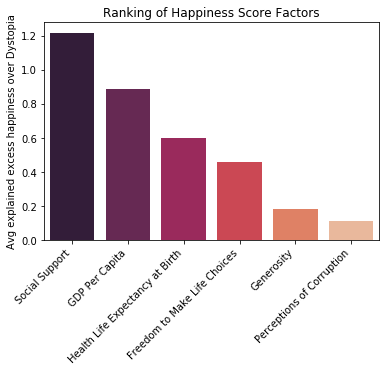

In [35]:
#Create a bar chart that ranks the happiess score indicators

regression_data_2018_avg = pd.DataFrame({"Avg" : merged_data[["GDP R", "Social Support R", "Healthy LE R","Freedom R", "Generosity R", "Corruption R"]].mean()})
regression_data_2018_avg = regression_data_2018_avg.sort_values(by="Avg", ascending=False)

factors = ["Social Support", "GDP Per Capita", "Health Life Expectancy at Birth", "Freedom to Make Life Choices", "Generosity", "Perceptions of Corruption"]

factors_values = regression_data_2018_avg["Avg"]

x_axis = np.arange(len(factors))

sns.barplot(x_axis, factors_values, palette="rocket")

tick_locations = [value for value in x_axis]
plt.xticks(tick_locations, factors, rotation = 45, ha="right")

plt.title("Ranking of Happiness Score Factors")
plt.ylabel("Avg explained excess happiness over Dystopia")

plt.savefig("./Images/Ranking_Happiness_Factors.png")

plt.show()



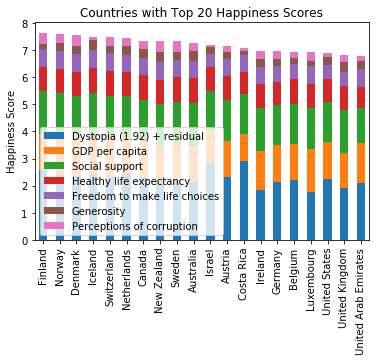

In [36]:
#Create a stacked bar chart that shows how much each factor contributes to the happiness score for the top 20 countries

happiest_stacked = merged_data[0:20]

x= happiest_stacked[['Country','Dystopia Residual','GDP R','Social Support R','Healthy LE R','Freedom R','Generosity R','Corruption R']]
y= x.set_index('Country')
z=y.groupby('Country').mean()
happiest_stacked.set_index("Country",drop=True, inplace=True)
happiest_stacked.sort_values(by=['Happiness Score'], ascending=False)[['Dystopia Residual','GDP R','Social Support R','Healthy LE R','Freedom R','Generosity R','Corruption R']].plot.bar(stacked=True)

plt.title("Countries with Top 20 Happiness Scores")
plt.xlabel("")
plt.ylabel("Happiness Score")
plt.legend(labels= ["Dystopia (1.92) + residual","GDP per capita", "Social support", "Healthy life expectancy", "Freedom to make life choices", "Generosity", "Perceptions of corruption"])


plt.savefig("./Images/Top_20.png")

plt.show()


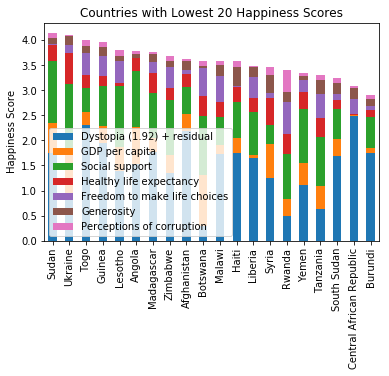

In [37]:
#Create a stacked bar chart that shows how much each factor contributes to the happiness score for the bottom 20 countries

unhappiest_stacked = merged_data[136:156]

x= unhappiest_stacked[['Country','Dystopia Residual','GDP R','Social Support R','Healthy LE R','Freedom R','Generosity R','Corruption R', ]]
y= x.set_index('Country')
z=y.groupby('Country').mean()
unhappiest_stacked.set_index("Country",drop=True, inplace=True)
unhappiest_stacked.sort_values(by=['Happiness Score'], ascending=False)[['Dystopia Residual','GDP R','Social Support R','Healthy LE R','Freedom R','Generosity R','Corruption R']].plot.bar(stacked=True)

plt.title("Countries with Lowest 20 Happiness Scores")
plt.xlabel("")
plt.ylabel("Happiness Score")
plt.legend(labels= ["Dystopia (1.92) + residual","GDP per capita", "Social support", "Healthy life expectancy", "Freedom to make life choices", "Generosity", "Perceptions of corruption"])


plt.savefig("./Images/Lowest_20.png")

plt.show()


In [38]:
#Import and read the csv file with the country code information and store it into a dataframe

country_codes_file = "./Resources/country-codes_csv.csv"
country_codes_full = pd.read_csv(country_codes_file)
country_codes = country_codes_full[["official_name_en", "ISO3166-1-Alpha-3"]]
country_codes = country_codes.rename(columns = {"official_name_en" : "Country" , "ISO3166-1-Alpha-3" : "Country Code"})

{'col1': [1, 2], 'col2': [3, 4]}
cyprus_df = pd.DataFrame({"Country" : ["Northern Cyprus"] , "Country Code" : ["CYP"]})
country_codes = country_codes.append(cyprus_df)

#pd.options.display.max_rows = 4000
#display(country_codes)

country_codes.head()



,Country,Country Code
0,Republic of China,TWN
1,Afghanistan,AFG
2,Albania,ALB
3,Algeria,DZA
4,American Samoa,ASM


In [39]:
# Clean data and merge the dataframes with the country code and happiness report information 

cleaned_data = merged_data.replace(
    {"United States": "United States of America", 
     "United Kingdom": "United Kingdom of Great Britain and Northern Ireland",
     "Czech Republic": "Czechia",
     "Taiwan Province of China": "Republic of China",
     "Russia": "Russian Federation",
     "South Korea": "Republic of Korea",
     "Moldova":"Republic of Moldova",
     "Bolivia":"Bolivia (Plurinational State of)",
     "Venezuela":"Venezuela (Bolivarian Republic of)",
     "Macedonia":"The former Yugoslav Republic of Macedonia",
     "Vietnam": "Viet Nam",
     "Palestinian Territories": "State of Palestine",
     "Iran": "Iran (Islamic Republic of)",
     "Congo (Brazzaville)": "Congo",
     "Congo (Kinshasa)" : "Democratic Republic of the Congo",
     "Ivory Coast": "Côte d'Ivoire",
     "Syria": "Syrian Arab Republic",
     "Tanzania": "United Republic of Tanzania",
     "Laos": "Lao People's Democratic Republic",
    })

cleaned_data = pd.merge(cleaned_data, country_codes, on="Country", how="left")
     
cleaned_data.loc[cleaned_data['Country Code'].isnull(), :]

cleaned_data.head()



,Country,Happiness Score,Whisker-high,Whisker-low,Dystopia Residual,GDP R,Social Support R,Healthy LE R,Freedom R,Generosity R,...,Healthy LE,Social Support,Social Support SE,Freedom,Freedom SE,Generosity,Generosity SE,Corruption,Corruption SE,Country Code
0,Finland,7.6321,7.694913,7.569287,2.595186,1.305095,1.592134,0.874454,0.680633,0.191638,...,71.517502,0.956149,0.003921,0.946694,0.005143,0.421381,0.010529,0.221270,0.008508,FIN
1,Norway,7.5937,7.657077,7.530323,2.383242,1.455627,1.582340,0.860763,0.686420,0.285636,...,71.086586,0.952147,0.004899,0.951561,0.005052,0.625537,0.010838,0.319610,0.009513,NOR
2,Denmark,7.5553,7.623292,7.487309,2.370179,1.351153,1.590453,0.867933,0.683251,0.284392,...,71.312271,0.955462,0.004486,0.948895,0.004695,0.579054,0.010585,0.193662,0.008053,DNK
3,Iceland,7.4952,7.592534,7.397867,2.425990,1.343301,1.644378,0.913802,0.676502,0.353233,...,72.755981,0.977497,0.004214,0.943219,0.007094,0.684818,0.014125,0.691878,0.012740,ISL
4,Switzerland,7.4873,7.569994,7.404606,2.319529,1.419727,1.548998,0.927076,0.659779,0.255525,...,73.173759,0.938523,0.005689,0.929152,0.006759,0.549967,0.012200,0.288248,0.010439,CHE


In [40]:
#Create a world map visualization that shows the happiness score for each country

plotly.tools.set_credentials_file(username='VarshaVarsha', api_key= apikey)

data = [ dict(
        type = 'choropleth',
        locations = cleaned_data['Country Code'],
        z = cleaned_data['Happiness Score'],
        text = cleaned_data['Country'],
        colorscale = [[0,"rgb(5, 10, 172)"],[0.35,"rgb(40, 60, 190)"],[0.5,"rgb(70, 100, 245)"],\
            [0.6,"rgb(90, 120, 245)"],[0.7,"rgb(106, 137, 247)"],[1,"rgb(220, 220, 220)"]],
        autocolorscale = False,
        reversescale = True,
        marker = dict(
            line = dict (
                color = 'rgb(180,180,180)',
                width = 0.5
            ) ),
        colorbar = dict(
            autotick = False,
            title = 'Happiness<br>Score'),
      ) ]

layout = dict(
    title = 'Happiness Scores Across the World<br>Source:\
            <http://worldhappiness.report/ed/2017/>',
    geo = dict(
        showframe = False,
        showcoastlines = False,
        projection = dict(
            type = 'Mercator'
        )
    )
)

fig = dict( data=data, layout=layout )
py.iplot( fig, validate=False, filename='d3-world-map' )

plt.savefig("./Images/Happiness_World_Map.png")

plt.show()

High five! You successfully sent some data to your account on plotly. View your plot in your browser at https://plot.ly/~VarshaVarsha/0 or inside your plot.ly account where it is named 'd3-world-map'


<Figure size 432x288 with 0 Axes>

In [41]:
#Import and read the datasets regarding annual temperature and precipitation and store them into dataframes

weather_file = "./Resources/cckp_historical_data_0.xls"
temperature_data= pd.read_excel(weather_file, sheet_name="Country_temperatureCRU")
temperature_data = temperature_data[["ISO_3DIGIT", "Annual_temp"]]
temperature_data = temperature_data.rename(columns = {"ISO_3DIGIT" : "Country Code", "Annual_temp" : "Annual Temperature"})
temperature_data.head()

precipitation_data = pd.read_excel(weather_file, sheet_name = "Country_precipitationCRU")
precipitation_data = precipitation_data[["ISO_3DIGIT", "Annual_precip"]]
precipitation_data = precipitation_data.rename(columns = {"ISO_3DIGIT" : "Country Code", "Annual_precip" : "Annual Precipitation"})
precipitation_data.head()

#Merge the two dataframes to the previous dataframe

weather_merge = cleaned_data.merge(temperature_data,on="Country Code", how="inner").merge(precipitation_data,on="Country Code", how="inner")
weather_merge.head()


,Country,Happiness Score,Whisker-high,Whisker-low,Dystopia Residual,GDP R,Social Support R,Healthy LE R,Freedom R,Generosity R,...,Social Support SE,Freedom,Freedom SE,Generosity,Generosity SE,Corruption,Corruption SE,Country Code,Annual Temperature,Annual Precipitation
0,Finland,7.6321,7.694913,7.569287,2.595186,1.305095,1.592134,0.874454,0.680633,0.191638,...,0.003921,0.946694,0.005143,0.421381,0.010529,0.221270,0.008508,FIN,1.347861,524.701104
1,Norway,7.5937,7.657077,7.530323,2.383242,1.455627,1.582340,0.860763,0.686420,0.285636,...,0.004899,0.951561,0.005052,0.625537,0.010838,0.319610,0.009513,NOR,0.753892,1051.840741
2,Denmark,7.5553,7.623292,7.487309,2.370179,1.351153,1.590453,0.867933,0.683251,0.284392,...,0.004486,0.948895,0.004695,0.579054,0.010585,0.193662,0.008053,DNK,7.818978,698.649857
3,Iceland,7.4952,7.592534,7.397867,2.425990,1.343301,1.644378,0.913802,0.676502,0.353233,...,0.004214,0.943219,0.007094,0.684818,0.014125,0.691878,0.012740,ISL,1.351409,1039.821209
4,Switzerland,7.4873,7.569994,7.404606,2.319529,1.419727,1.548998,0.927076,0.659779,0.255525,...,0.005689,0.929152,0.006759,0.549967,0.012200,0.288248,0.010439,CHE,4.749057,1646.412455


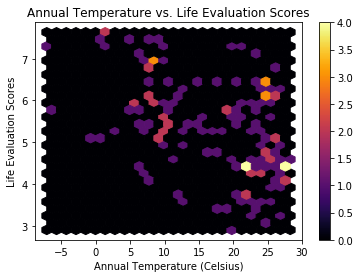

In [42]:
#Create a hexbin graph showing the relationship between temperature and life evaluation scores

plt.hexbin(x= weather_merge["Annual Temperature"], y=weather_merge["Life Ladder"], gridsize=25, cmap='inferno')
plt.colorbar()
plt.title("Annual Temperature vs. Life Evaluation Scores")
plt.xlabel("Annual Temperature (Celsius)")
plt.ylabel("Life Evaluation Scores")

plt.savefig("./Images/Temperature_LE.png")

plt.show()

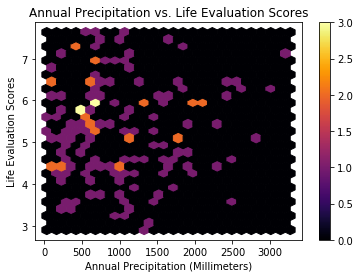

In [43]:
#Create a hexbin graph showing the relationship between precipitation and life evaluation scores

plt.hexbin(x= weather_merge["Annual Precipitation"], y=weather_merge["Life Ladder"], gridsize=25, cmap='inferno')
plt.colorbar()
plt.title("Annual Precipitation vs. Life Evaluation Scores")
plt.xlabel("Annual Precipitation (Millimeters)")
plt.ylabel("Life Evaluation Scores")

plt.savefig("./Images/Precipitation_LE.png")

plt.show()

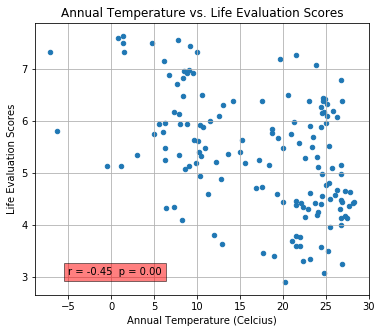

In [44]:
#Create a scatterplot graph showing the relationship between temperature and life evaluation scores

weather_merge.plot(kind="scatter",y="Life Ladder",x="Annual Temperature", grid=True, figsize=(6,5),
           title="Annual Temperature vs. Life Evaluation Scores")
plt.xlabel("Annual Temperature (Celcius)")
plt.ylabel("Life Evaluation Scores")


temperature_corr = list(pearsonr(weather_merge["Annual Temperature"], weather_merge["Life Ladder"]))
temperature_correlation = "r = "+ str("{0:.2f}".format(temperature_corr[0]))+ "  p = " + str("{0:.2f}".format(temperature_corr[1]))


plt.text(-5, 3,temperature_correlation,
     horizontalalignment='left',
     verticalalignment='bottom', 
     bbox=dict(facecolor='red', alpha=0.5))

plt.savefig("./Images/Scatter_Temperature_LE.png")

plt.show()

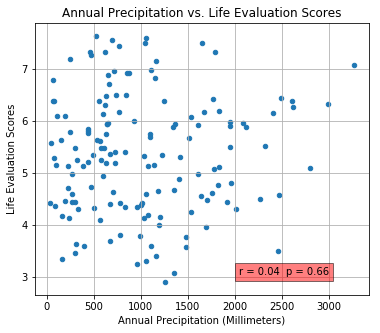

In [45]:
#Create a scatterplot graph showing the relationship between precipitation and life evaluation scores

weather_merge.plot(kind="scatter",y="Life Ladder",x="Annual Precipitation", grid=True, figsize=(6,5),
           title="Annual Precipitation vs. Life Evaluation Scores")
plt.xlabel("Annual Precipitation (Millimeters)")
plt.ylabel("Life Evaluation Scores")

precipitation_corr = list(pearsonr(weather_merge["Annual Precipitation"], weather_merge["Life Ladder"]))
precipitation_correlation = "r = "+ str("{0:.2f}".format(precipitation_corr[0]))+ "  p = " + str("{0:.2f}".format(precipitation_corr[1]))

plt.text(3000, 3,precipitation_correlation,
     horizontalalignment='right',
     verticalalignment='bottom',
     bbox=dict(facecolor='red', alpha=0.5))

plt.savefig("./Images/Scatter_Precipitation_LE.png")

plt.show()


In [46]:
#Import and read the datasets regarding religion and store them into dataframes

religion_file = "./Resources/Gallup Religion Data.xlsx"
religion_data= pd.read_excel(religion_file, sheet_name="Religion 1")
religion2_data= pd.read_excel(religion_file, sheet_name="Religion 2")

del religion_data["Country (Uppercase)"]
del religion2_data["Country (Uppercase)"]


#Merge the two dataframes regarding religion

religion_data = religion_data.merge(religion2_data,on="Country", how="outer")
religion_data.head()




,Country,A religious person,Not a religious person,A convinced atheist,Do not know / no response,God,Life after death,People have a soul,Hell,Heaven
0,Albania,0.56,0.30,0.09,0.05,0.80,0.40,0.57,0.40,0.42
1,Argentina,0.78,0.16,0.04,0.02,0.91,0.63,0.84,0.57,0.75
2,Armenia,0.92,0.04,0.02,0.01,0.93,0.41,0.72,0.41,0.44
3,Australia,0.31,0.50,0.13,0.07,0.46,0.42,0.63,0.31,0.42
4,Austria,0.41,0.43,0.10,0.06,0.50,0.39,0.72,0.13,0.29


In [47]:
#Clean the religion dataframe and merge it with the previous dataframe

religion_data = religion_data.replace(
    {"Bosnia & Herzegovina": "Bosnia and Herzegovina", 
     "Czech Republic" : "Czechia",
     "Dr Congo" : "Democratic Republic of the Congo",
     #"Fiji" is not in happiness data
     "Hong Kong" : "China, Hong Kong Special Administrative Region",
     "Iran" : "Iran (Islamic Republic of)",
     "Ivory Coast" : "Côte d'Ivoire",
     "Macedonia" : "The former Yugoslav Republic of Macedonia",
     "Palestinian Terr." : "State of Palestine",
     #"Papua New Guinea" is not in happiness data
     "Russia" : "Russian Federation",
     "South Korea" : "Republic of Korea",
     "Uk" : "United Kingdom of Great Britain and Northern Ireland",
     "Usa" : "United States of America",
     "Vietnam" : "Viet Nam"
    })


religion_merge = pd.merge(cleaned_data, religion_data, on="Country", how="inner")

#religion_merge.loc[merge_table['Country Code'].isnull(), :]

religion_merge.head()



,Country,Happiness Score,Whisker-high,Whisker-low,Dystopia Residual,GDP R,Social Support R,Healthy LE R,Freedom R,Generosity R,...,Country Code,A religious person,Not a religious person,A convinced atheist,Do not know / no response,God,Life after death,People have a soul,Hell,Heaven
0,Finland,7.6321,7.694913,7.569287,2.595186,1.305095,1.592134,0.874454,0.680633,0.191638,...,FIN,0.39,0.47,0.08,0.07,0.43,0.34,0.61,0.17,0.31
1,Norway,7.5937,7.657077,7.530323,2.383242,1.455627,1.582340,0.860763,0.686420,0.285636,...,NOR,0.30,0.50,0.12,0.08,0.36,0.32,0.63,0.16,0.30
2,Denmark,7.5553,7.623292,7.487309,2.370179,1.351153,1.590453,0.867933,0.683251,0.284392,...,DNK,0.32,0.47,0.14,0.07,0.36,0.23,0.57,0.06,0.20
3,Iceland,7.4952,7.592534,7.397867,2.425990,1.343301,1.644378,0.913802,0.676502,0.353233,...,ISL,0.46,0.32,0.17,0.05,0.44,0.40,0.65,0.06,0.26
4,Canada,7.3285,7.420735,7.236264,2.305750,1.330412,1.531910,0.895846,0.653067,0.320637,...,CAN,0.37,0.47,0.10,0.06,0.55,0.45,0.69,0.28,0.40


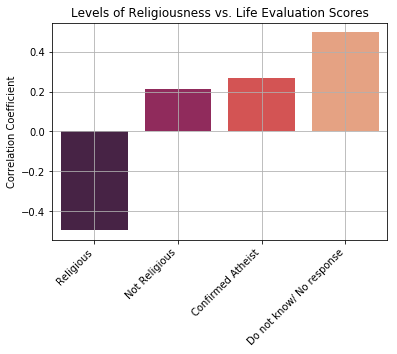

In [48]:
#Create a bar chart that compares the correlattion coefficients of varying levels of religiousness vs. life evaluation scores 

religion_corr_ranking = pd.DataFrame({"Correlation Coefficient" : religion_merge[["Life Ladder","A religious person", "Not a religious person", "A convinced atheist","Do not know / no response "]].corr('pearson')["Life Ladder"]})
religion_corr_ranking = religion_corr_ranking.drop(["Life Ladder"])

religion_corr_ranking = religion_corr_ranking.sort_values(by="Correlation Coefficient", ascending=True)

factors_r = ["Religious", "Not Religious", "Confirmed Atheist", "Do not know/ No response"]

factors_values_r = religion_corr_ranking["Correlation Coefficient"]

x_axis_r = np.arange(len(factors_r))

sns.barplot(x_axis_r, factors_values_r, palette="rocket")

tick_locations_r = [value for value in x_axis_r]
plt.xticks(tick_locations_r, factors_r, rotation = 45, ha="right")
plt.grid()

plt.title("Levels of Religiousness vs. Life Evaluation Scores")

plt.savefig("./Images/Religion1_LE.png")

plt.show()


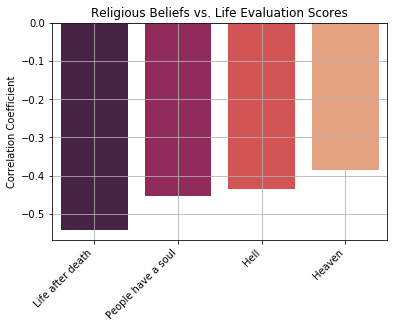

In [49]:
#Create a bar chart that compares the correlattion coefficients of having certain religious beliefs vs. life evaluation scores 

religion2_corr_ranking = pd.DataFrame({"Correlation Coefficient" : religion_merge[["Life Ladder","Life after death", "People have a soul", "Hell","Heaven"]].corr('pearson')["Life Ladder"]})
religion2_corr_ranking = religion2_corr_ranking.drop(["Life Ladder"])

religion2_corr_ranking = religion2_corr_ranking.sort_values(by="Correlation Coefficient", ascending=True)

factors_r2 = ["Life after death", "People have a soul", "Hell", "Heaven"]

factors_values_r2 = religion2_corr_ranking["Correlation Coefficient"]

x_axis_r2 = np.arange(len(factors_r2))

sns.barplot(x_axis_r2, factors_values_r2, palette="rocket")

tick_locations_r2 = [value for value in x_axis_r2]
plt.xticks(tick_locations_r2, factors_r2, rotation = 45, ha="right")
plt.grid()

plt.title("Religious Beliefs vs. Life Evaluation Scores")

plt.savefig("./Images/Religion2_LE.png")

plt.show()

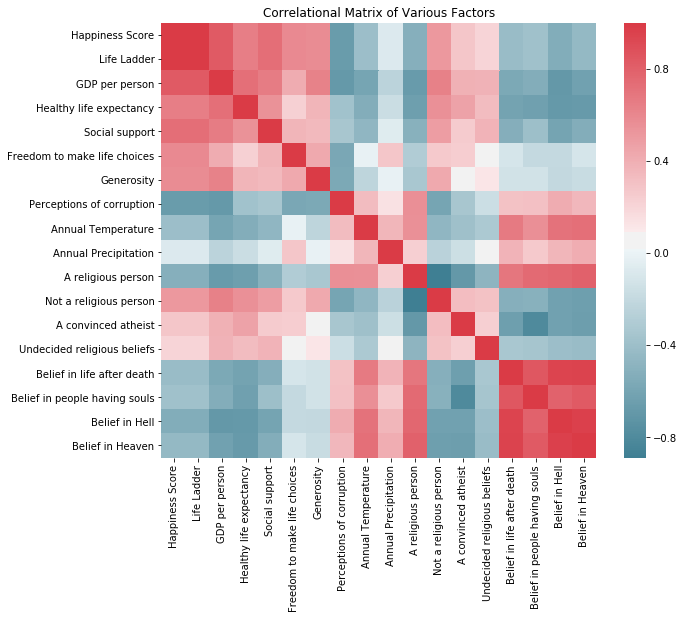

In [50]:
#Create a correlational matrix using all of the factors from this project

correlational_data =  religion_merge.merge(temperature_data,on="Country Code", how="outer").merge(precipitation_data,on="Country Code", how="inner")

correlational_data = correlational_data[["Happiness Score", "Life Ladder", "GDP", "Healthy LE", "Social Support", "Freedom", "Generosity", "Corruption", "Annual Temperature", "Annual Precipitation", "A religious person", "Not a religious person", "A convinced atheist", "Do not know / no response ", "Life after death", "People have a soul", "Hell", "Heaven"]]          

correlational_data = correlational_data.rename(columns = {"GDP": "GDP per person",
                                    "Healthy LE" : "Healthy life expectancy",
                                     "Social Support" : "Social support",
                                     "Freedom" : "Freedom to make life choices",
                                     "Corruption" : "Perceptions of corruption",
                                     "Do not know / no response " : "Undecided religious beliefs",
                                     "Life after death" : "Belief in life after death",
                                     "People have a soul" : "Belief in people having souls",
                                     "Hell" : "Belief in Hell",
                                     "Heaven" : "Belief in Heaven"
                                    })

f, ax = plt.subplots(figsize=(10, 8))
corr = correlational_data.corr()
sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool), cmap=sns.diverging_palette(220, 10, as_cmap=True),square=True, ax=ax)                                   

plt.title("Correlational Matrix of Various Factors")

plt.savefig("./Images/Correlational_Matrix.png")

plt.show()

